In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
arf_drift_idx = [
    10187, 20068, 28080, 28090, 30143, 30144, 30395, 35851, 40029, 40165, 60076, 60106, 60151, 
    60173, 60200, 60504, 70092, 77588, 78150, 80019, 80044, 80061, 80127, 81772, 90623, 91905, 
    100021, 100044, 100049, 100079, 100344, 120009, 120033, 120041, 120092, 120100, 120128, 122028, 
    139444, 140023, 140050, 140062, 140077, 140079, 140085, 140366, 160048, 160058, 160068, 160093, 
    160191, 170364, 180011, 180038, 180047, 180087, 180985, 188940, 190361, 200066, 200071, 200129, 
    200388, 200680, 220094, 220111, 220327, 230043, 230062, 230064, 240056, 240086, 240125, 250121, 
    260024, 260037, 260068, 260069, 260071, 270392, 280031, 280042, 280085, 280151, 284847, 290034, 
    295034, 300037, 300065, 300079, 300100, 300157, 307504, 310056, 320048, 320073, 320087, 320093, 
    320274, 326486, 339936, 340024, 340032, 340065, 340085, 340128, 340214, 350268, 360054, 360059, 
    360078, 360112, 360311, 360445, 380074, 380076, 380086, 380199, 382746
]

arf_fires_drift_idx = [
    10539, 11886, 14259, 26214, 26800, 30238, 34132, 34419, 34508, 34533, 40087, 50541, 50641, 
    50706, 53552, 55127, 55387, 58919, 60038, 60329, 70650, 71999, 74756, 80124, 80235, 82944, 
    90066, 90155, 92562, 97567, 100110, 100118, 110220, 111069, 111124, 112840, 118820, 120041, 
    120079, 120162, 130072, 138524, 139069, 140030, 140034, 140038, 140068, 141319, 142699, 154228, 
    160058, 160091, 160093, 160118, 160419, 170432, 179623, 180039, 180045, 180148, 180437, 181559, 
    182672, 192245, 200034, 200063, 200218, 200308, 200442, 209220, 210174, 211273, 213896, 220062, 
    220067, 220165, 220329, 230348, 234887, 234950, 234957, 234983, 240048, 240270, 250125, 250152, 
    250188, 250580, 260062, 260088, 260203, 270101, 270108, 279450, 280026, 280031, 280114, 280158, 
    290129, 290160, 300045, 300077, 300093, 300115, 310087, 313263, 320089, 320165, 320233, 320253, 
    330266, 330654, 332318, 340069, 340073, 340087, 350240, 350745, 352332, 360021, 360025, 360046, 
    360335, 370263, 370577, 371109, 380033, 380242, 388762
]

arf_ofs_drift_idx = [
    11949, 20033, 20034, 20706, 30151, 30195, 40077, 40082, 50022, 50028, 50042, 50054, 50073, 
    60057, 70250, 70284, 74689, 80126, 80785, 90052, 90059, 90236, 100127, 100236, 110064, 110294, 
    110446, 120182, 120213, 121458, 130085, 130089, 130504, 140025, 140076, 140140, 153959, 160015, 
    160046, 160059, 160060, 170121, 170325, 170825, 180078, 190234, 190317, 190342, 200081, 200217,
    210273, 214862, 215488, 220032, 220040, 220044, 220057, 220063, 230066, 240053, 240058, 240106, 
    250304, 250346, 251807, 260459, 261230, 261994, 270028, 270097, 270235, 280115, 280180, 280222, 
    290026, 290036, 290113, 300158, 300230, 300434, 310142, 320048, 320083, 320100, 320142, 320273, 
    330129, 330217, 340102, 340126, 340517, 340597, 350026, 350051, 350139, 360139, 360500, 360543, 
    370055, 370178, 370412, 380029, 380033, 380084, 380678
]

C:\Users\Carlo Alamani\AppData\Local\Temp\ipykernel_11468\1147073868.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


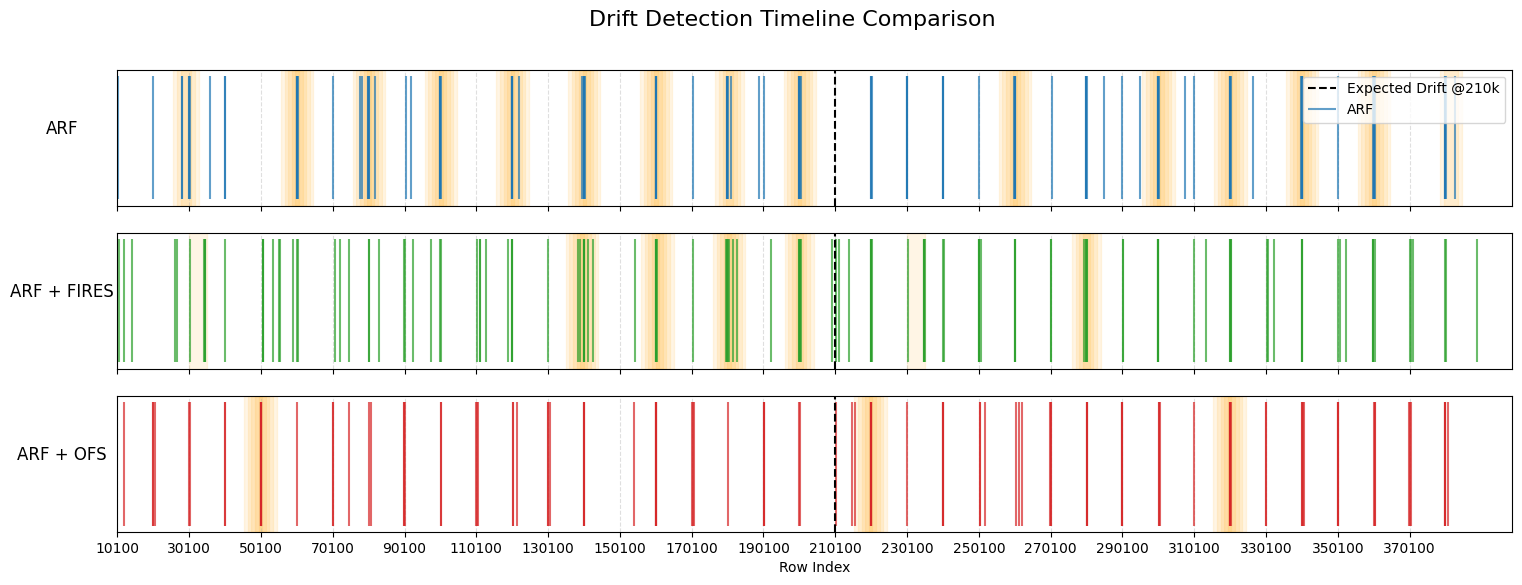

In [4]:

# Drift index lists
methods = {
    "ARF": arf_drift_idx,
    "ARF + FIRES": arf_fires_drift_idx,
    "ARF + OFS": arf_ofs_drift_idx
}

# Define color map for each method
colors = {
    "ARF": "tab:blue",
    "ARF + FIRES": "tab:green",
    "ARF + OFS": "tab:red"
}

# Create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 6), sharex=True, gridspec_kw={'hspace': 0.2})

# Function to highlight dense drift zones
def highlight_dense_regions(ax, indices, threshold=5, window=5000):
    indices = np.array(indices)
    for center in range(indices.min(), indices.max(), 1000):
        count = np.sum((indices >= center - window//2) & (indices <= center + window//2))
        if count >= threshold:
            ax.axvspan(center - window//2, center + window//2, color='orange', alpha=0.1)

# Plot each method in its own subplot
for i, (label, indices) in enumerate(methods.items()):
    ax = axes[i]
    ax.vlines(indices, ymin=0, ymax=1, color=colors[label], alpha=0.7, label=label)
    highlight_dense_regions(ax, indices)
    ax.axvline(210000, color='black', linestyle='--', linewidth=1.5, label='Expected Drift @210k' if i == 0 else "")
    ax.set_yticks([])
    ax.set_ylabel(label, rotation=0, labelpad=40, fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.4)
    if i == 0:
        ax.legend(loc='upper right', fontsize=10)

# X-axis formatting
axes[-1].set_xlabel("Row Index")
axes[-1].set_xlim(10100, max(max(l) for l in methods.values()) + 10000)

# Optional: Set spaced x-ticks
xticks = list(range(10100, 390000, 20000))
axes[-1].set_xticks(xticks)

plt.suptitle("Drift Detection Timeline Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()